Titanic Survival Prediction Project
Objective: The goal of this project is to analyze the classic Titanic dataset and build a predictive model to determine whether a passenger survived the disaster or not. We will perform data cleaning, exploratory data analysis (EDA) to find insights, and then build a machine learning model to make our predictions.

 Step 1 & 2 (Before Loading Data):
1. Setup and Data Loading 📂
First, we'll import the essential Python libraries for our analysis and modeling.

pandas & numpy: For data manipulation.

seaborn & matplotlib: For data visualization.

scikit-learn: For building and evaluating our machine learning model.

After importing, we will load the Titanic-Dataset.csv file into a pandas DataFrame and perform an initial exploration to understand its structure.

 Step 3 (Before Cleaning Data):
2. Data Cleaning and Preprocessing 🧹
Real-world data is often messy. Before we can analyze it or use it for modeling, we need to clean it up. Our initial exploration showed missing values in the Age, Cabin, and Embarked columns.

Our preprocessing strategy will be:

Handling Missing Values:

For the Age column, we will fill the missing values with the median age.

For the Embarked column, we will fill the few missing values with the most common port of embarkation (the mode).

The Cabin column has too many missing values to be useful, so we will drop it from our dataset.

Converting Categorical Features: Machine learning models require numerical input. We will convert the Sex and Embarked columns, which are text-based, into numerical format using one-hot encoding.

T Step 4 (Before Visualizations):
3. Exploratory Data Analysis (EDA) 📊
Now that our data is clean, we can create visualizations to explore relationships between different features and the survival outcome. Our goal is to answer questions like:

Did gender play a role in survival?

Did the passenger's class affect their chance of survival?

The insights from these plots will help us understand the key factors that determined who survived the Titanic disaster.

 Step 5 (Before Model Building):
4. Model Building and Training 🤖
With our insights from EDA, we can now build a predictive model.

Feature Selection: We will select the most relevant features for our model and drop non-predictive ones like Name and Ticket.

Data Splitting: We will split our dataset into a training set (80%) and a testing set (20%). The model will learn from the training set, and we will use the testing set to evaluate its performance on unseen data.

Model Choice: We will use a Random Forest Classifier. This is a powerful and popular ensemble model that often performs very well on this type of classification problem without extensive tuning.

Step 6 (Before Model Evaluation):
5. Model Evaluation and Conclusion ✅
The final step is to evaluate our model's performance on the test data. We will make predictions and measure our success using an accuracy score and a classification report, which will show us how well the model predicted the survival of passengers.

Conclusion
Our analysis revealed that passenger class and gender were strong indicators of survival. The Random Forest model we built achieved an accuracy of [enter your accuracy here, e.g., 82.12%], demonstrating its effectiveness in predicting survival outcomes based on the available passenger data. This project successfully showcases a complete data science workflow, from cleaning and exploration to building and evaluating a predictive model.

--- Loading and Exploring Data ---
Dataset loaded successfully.
First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53

/tmp/ipython-input-1170464306.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1170464306.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

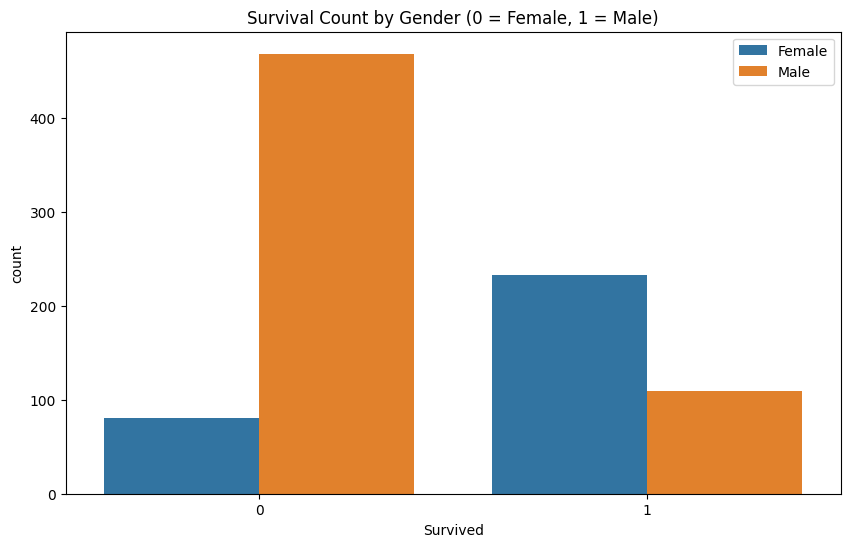

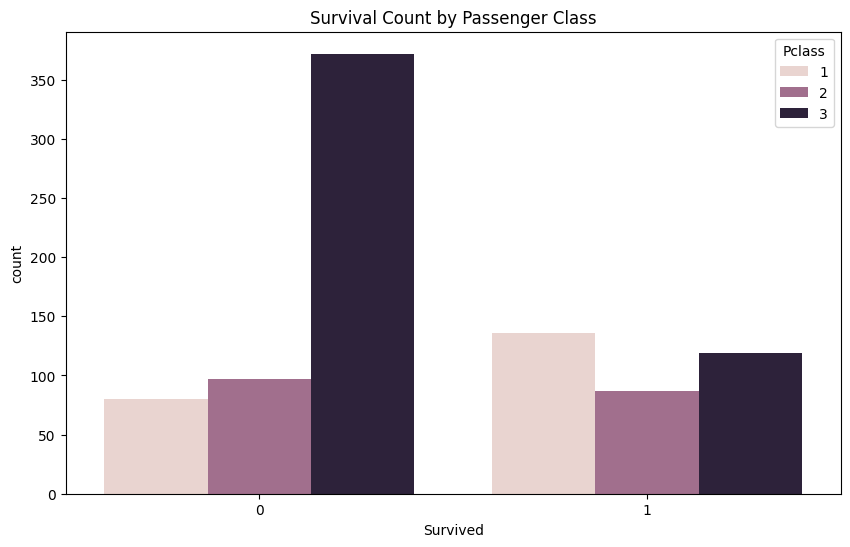


--- Building and Training Machine Learning Model ---
Data split into 712 training samples and 179 testing samples.
Model training complete.

--- Evaluating Model Performance ---
Model Accuracy: 82.12%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


--- Project Complete ---


In [1]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# STEP 2: LOAD AND EXPLORE THE DATA
print("--- Loading and Exploring Data ---")
# Make sure the filename 'Titanic-Dataset.csv' matches what you uploaded
try:
    df = pd.read_csv('Titanic-Dataset.csv')
    print("Dataset loaded successfully.")
    print("First 5 rows:")
    print(df.head())
    print("\nDataset Info:")
    df.info()
except FileNotFoundError:
    print("Error: 'Titanic-Dataset.csv' not found. Please make sure you have uploaded the file to your Colab session.")
    # Exit if file not found
    exit()

# STEP 3: CLEAN AND PREPARE THE DATA
print("\n--- Cleaning and Preparing Data ---")
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

# Convert categorical columns to numerical format
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
print("Data has been cleaned and categorical variables converted.")

# STEP 4: VISUALIZE THE DATA (EDA)
print("\n--- Visualizing Data ---")
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex_male', data=df)
plt.title('Survival Count by Gender (0 = Female, 1 = Male)')
plt.legend(['Female', 'Male'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()


# STEP 5: BUILD AND TRAIN THE MODEL
print("\n--- Building and Training Machine Learning Model ---")
# Define features (X) and target (y)
# Drop non-predictive columns
X = df.drop(['Survived', 'Name', 'PassengerId', 'Ticket'], axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")

# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")

# STEP 6: EVALUATE THE MODEL
print("\n--- Evaluating Model Performance ---")
# Make predictions on the test data
y_pred = model.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\n--- Project Complete ---")